In [19]:
import os
import json
runs = os.listdir("results_vsf")

In [20]:
vsf_scores = []
for i in runs: 
    with open(f"results_vsf/{i}/vqa.json", "r") as f: 
        data = json.load(f)
        pos_score = sum([i['ans'][0] for i in data])
        neg_score = sum([i['ans'][1] for i in data])
        qua_score = sum([i['ans'][2] for i in data])
        vsf_scores.append([pos_score, neg_score, qua_score])
print(len(runs))
runs = os.listdir("results_nag")
nag_scores = []
for i in runs:
    with open(f"results_nag/{i}/vqa.json", "r") as f:
        data = json.load(f)
        pos_score = sum([i['ans'][0] for i in data])
        neg_score = sum([i['ans'][1] for i in data])
        qua_score = sum([i['ans'][2] for i in data])
        nag_scores.append([pos_score, neg_score, qua_score])
print(len(runs))


66
287


In [28]:
runs[np.array(nag_scores)[:,1].argmax()]

'3ijzsejr'

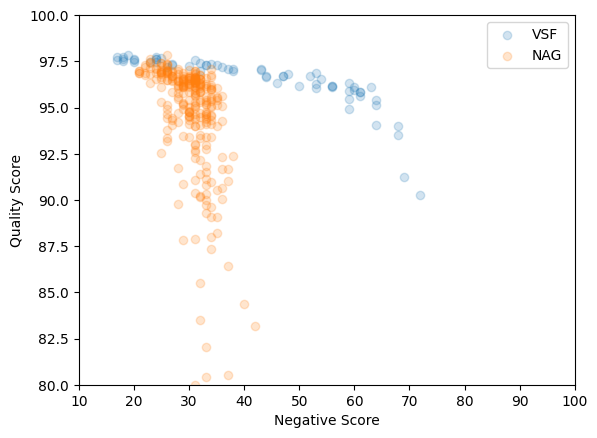

In [3]:
import pylab
import numpy as np 
vsf_scores = np.array(vsf_scores)
pylab.scatter(vsf_scores[:,1], vsf_scores[:,2], alpha=0.2, label='VSF')
nag_scores = np.array(nag_scores)
pylab.scatter(nag_scores[:,1], nag_scores[:,2], alpha=0.2, label='NAG')
pylab.xlim(10, 100) 
pylab.ylim(80, 100)
pylab.xlabel("Negative Score")
pylab.ylabel("Quality Score")
pylab.legend()

Text(0, 0.5, 'Positive Score')

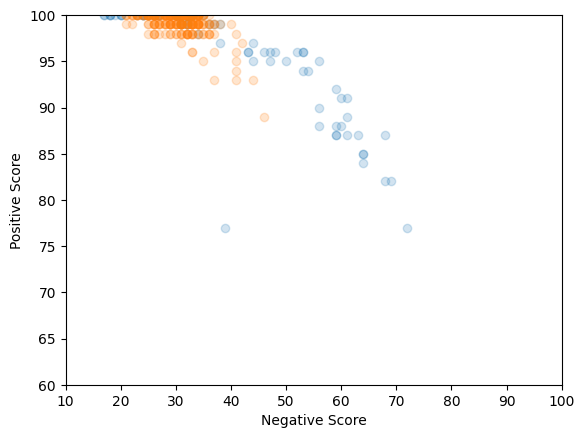

In [4]:
import pylab
import numpy as np 
vsf_scores = np.array(vsf_scores)
pylab.scatter(vsf_scores[:,1], vsf_scores[:,0], alpha=0.2)
nag_scores = np.array(nag_scores)
pylab.scatter(nag_scores[:,1], nag_scores[:,0], alpha=0.2)
pylab.xlim(10, 100) 
pylab.ylim(60, 100)
pylab.xlabel("Negative Score") 
pylab.ylabel("Positive Score")

In [15]:
nag_scores

array([[ 89.  ,  46.  ,  62.85],
       [ 93.  ,  44.  ,  66.2 ],
       [ 97.  ,  42.  ,  83.2 ],
       [ 94.  ,  41.  ,  69.8 ],
       [ 95.  ,  41.  ,  74.1 ],
       [ 98.  ,  41.  ,  78.1 ],
       [ 96.  ,  41.  ,  78.25],
       [ 93.  ,  41.  ,  75.15],
       [ 99.  ,  40.  ,  84.35],
       [ 99.  ,  38.  ,  92.4 ],
       [ 93.  ,  37.  ,  75.9 ],
       [ 96.  ,  37.  ,  80.5 ],
       [ 99.  ,  37.  ,  91.03],
       [ 99.  ,  37.  ,  91.68],
       [ 98.  ,  37.  ,  86.4 ],
       [ 99.  ,  36.  ,  90.05],
       [ 98.  ,  36.  ,  95.6 ],
       [ 98.  ,  36.  ,  95.1 ],
       [100.  ,  36.  ,  91.7 ],
       [ 98.  ,  36.  ,  90.65],
       [ 99.  ,  36.  ,  94.25],
       [ 99.  ,  36.  ,  92.3 ],
       [100.  ,  35.  ,  96.06],
       [ 95.  ,  35.  ,  77.35],
       [100.  ,  35.  ,  88.2 ],
       [ 98.  ,  35.  ,  93.98],
       [100.  ,  35.  ,  95.13],
       [ 99.  ,  35.  ,  95.58],
       [ 99.  ,  35.  ,  95.43],
       [ 99.  ,  35.  ,  89.05],
       [ 9

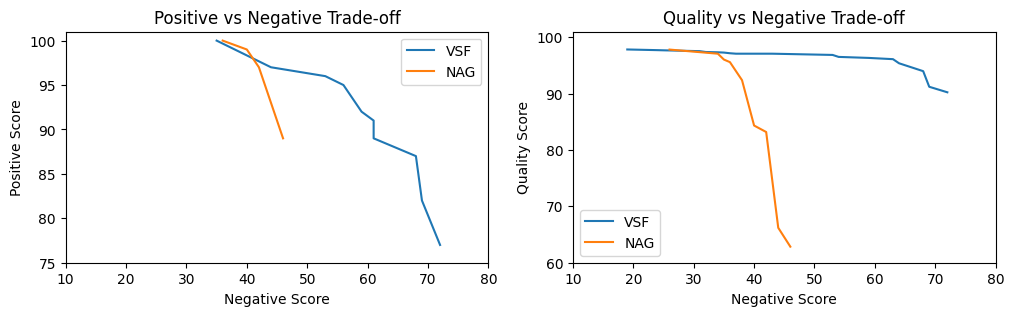

In [14]:
vsf_scores = vsf_scores[np.argsort(vsf_scores[:,1])[::-1]]
nag_scores = nag_scores[np.argsort(nag_scores[:,1])[::-1]]
current_max_pos = 0
vsf_points = []
for i in vsf_scores:
    if i[0] > current_max_pos:
        current_max_pos = i[0]
        vsf_points.append([i[0], i[1]])
        
current_max_pos = 0
nag_points = []
for i in nag_scores:
    if i[0] > current_max_pos:
        current_max_pos = i[0]
        nag_points.append([i[0], i[1]])

vsf_points = np.array(vsf_points)
nag_points = np.array(nag_points)
import pylab
import numpy as np 
vsf_scores = np.array(vsf_scores)
nag_scores = np.array(nag_scores)
pylab.figure(figsize=(12, 3))
pylab.subplot(1, 2, 1)
pylab.xlim(10, 80) 
pylab.ylim(75, 101)
pylab.plot(vsf_points[:,1], vsf_points[:,0], label='VSF')
pylab.plot(nag_points[:,1], nag_points[:,0], label='NAG')
pylab.xlabel("Negative Score") 
pylab.ylabel("Positive Score")
pylab.title("Positive vs Negative Trade-off")
pylab.legend()

vsf_scores = vsf_scores[np.argsort(vsf_scores[:,1])[::-1]]
nag_scores = nag_scores[np.argsort(nag_scores[:,1])[::-1]]
current_max_quality = 0
vsf_points = []
for i in vsf_scores:
    if i[2] > current_max_quality:
        current_max_quality = i[2]
        vsf_points.append([i[2], i[1]])
        
current_max_quality = 0
nag_points = []
for i in nag_scores:
    if i[2] > current_max_quality:
        current_max_quality = i[2]
        nag_points.append([i[2], i[1]])

vsf_points = np.array(vsf_points)
nag_points = np.array(nag_points)
import pylab
import numpy as np 
vsf_scores = np.array(vsf_scores)
nag_scores = np.array(nag_scores)
pylab.subplot(1, 2, 2)
pylab.xlim(10, 80) 
pylab.ylim(60, 101)
pylab.plot(vsf_points[:,1], vsf_points[:,0], label='VSF')
pylab.plot(nag_points[:,1], nag_points[:,0], label='NAG')
pylab.xlabel("Negative Score") 
pylab.ylabel("Quality Score")
pylab.title("Quality vs Negative Trade-off")
pylab.legend()

In [7]:
# scale it same range as pos score

In [8]:
index = np.argmax(nag_scores[:,1] + nag_scores[:,0] * 0.25 +nag_scores[:,2] * 0.25, axis=0)
runs = os.listdir("results_nag")
print("Best NAG run:", runs[index])
print(nag_scores[index])
print("Total Score:", nag_scores[index][0] + nag_scores[index][1] * 0.25 + nag_scores[index][2] * 0.25)
# print("normed quality score:", (nag_scores[index][2] - quality_mean) / quality_std)
# nag_alpha:0.963854710160938
# nag_scale:11.396780194310066
# nag_tau:7.933687913292021

Best NAG run: bo25ltmq
[97.  42.  83.2]
Total Score: 128.3


In [9]:
index = np.argmax(vsf_scores[:,1] + vsf_scores[:,0] * 0.25 +vsf_scores[:,2] * 0.25, axis=0)
runs = os.listdir("results_vsf")
print("Best VSF run:", runs[index])
print(vsf_scores[index])
print("Total Score:", vsf_scores[index][0] + vsf_scores[index][1] * 0.25 + vsf_scores[index][2] * 0.25)
# print("normed quality score:", (vsf_scores[index][2] - quality_mean) / quality_std)
# offset:0.050543996249802825
# scale:4.983785604546293

Best VSF run: 10rla6xb
[77.   72.   90.25]
Total Score: 117.56250000000001
